In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\13_Gurugram\Book_13_1_PM.csv')

In [3]:
df.head()

,Date,PM2.5
0,01-01-2021,175.785697
1,02-01-2021,91.330000
2,03-01-2021,106.390000
3,04-01-2021,212.860000
4,05-01-2021,164.527500


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.tail()

,Date,PM2.5
360,2021-12-27,175.2500
361,2021-12-28,145.3050
362,2021-12-29,230.4150
363,2021-12-30,176.1175
364,2021-12-31,158.6200


In [6]:
y = pd.Series(data=df['PM2.5'].values, index=df['Date'])

In [7]:
y.tail()

Date
2021-12-27    175.2500
2021-12-28    145.3050
2021-12-29    230.4150
2021-12-30    176.1175
2021-12-31    158.6200
dtype: float64

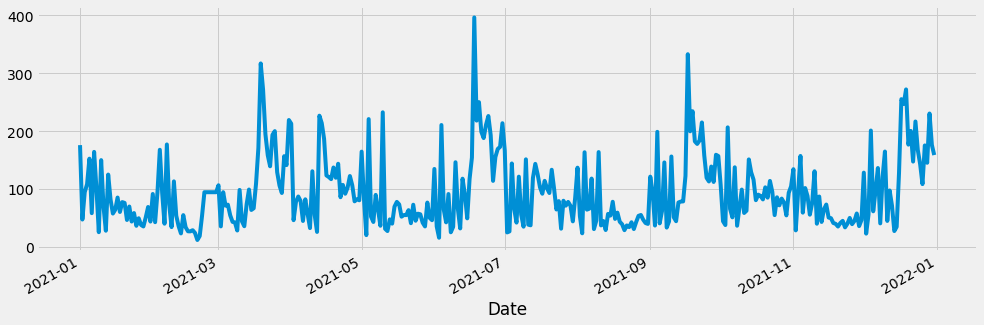

In [8]:
y.plot(figsize=(15, 5))
plt.show()

In [9]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [10]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 4471.945664462959
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 4152.626234598505
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 3921.9688842214755
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 4016.0089797532287
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 3809.754114699422
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 3657.8872312010953
ARIMA(0, 0, 0) x (0, 2, 0, 12) - AIC: 4189.247436421967
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 3794.0690980836903
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 3630.8106418864118
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 3993.4038325132647
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 3974.823548279688
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 3786.867988779625
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 3865.448612339846
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 3788.0648723496274
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 3659.4117311487025
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 3891.7266731564023
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 3773.36403116049
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 36

In [11]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3821      0.120      3.172      0.002       0.146       0.618
ma.L1         -1.6908      2.144     -0.789      0.430      -5.893       2.511
ma.L2          0.6907      1.497      0.461      0.644      -2.243       3.624
ma.S.L12      -1.7876      0.274     -6.534      0.000      -2.324      -1.251
ma.S.L24       0.7931      0.205      3.867      0.000       0.391       1.195
sigma2      1589.2756   3335.453      0.476      0.634   -4948.092    8126.643


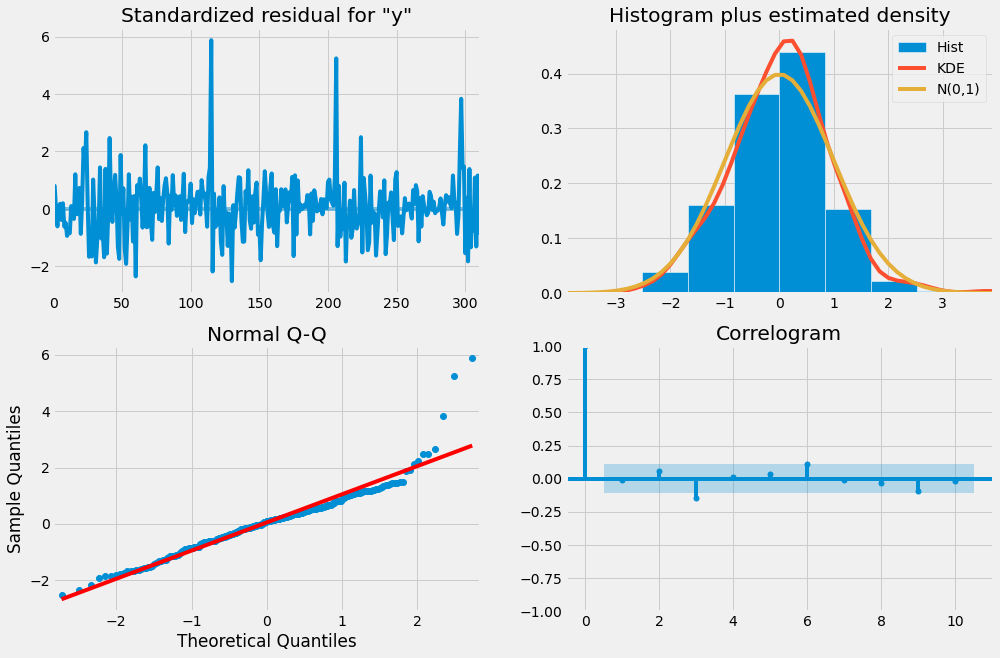

In [12]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [14]:
#a1=pred
#import pandas as pd
#a=pd.DataFrame(a1)
#print(pred)


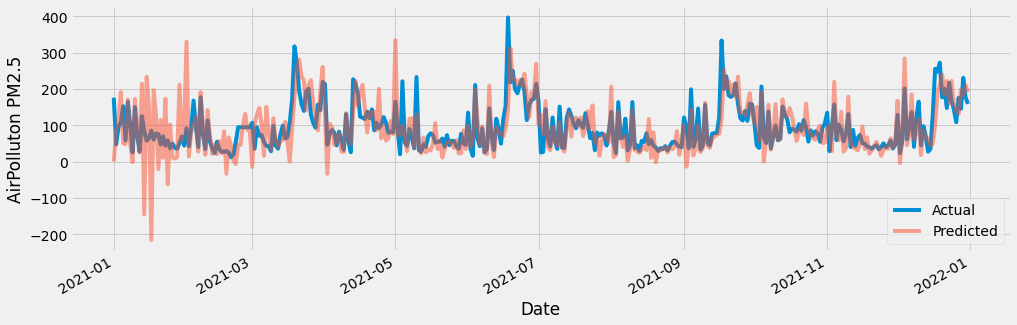

In [15]:
ax = y['2021-01-01':].plot(label='Actual', figsize=(15, 5))
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.5)

#ax.fill_between(pred_ci.index,
 #               pred_ci.iloc[:, 0],
  #              pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('AirPolluton PM2.5')
plt.legend()

plt.show()

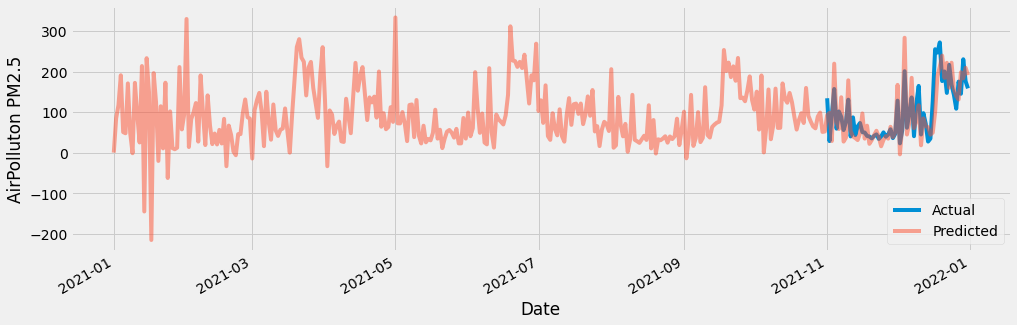

In [16]:
ax = y['2021-11-01':].plot(label='Actual', figsize=(15, 5))
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.5)

#ax.fill_between(pred_ci.index,
 #               pred_ci.iloc[:, 0],
  #              pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('AirPolluton PM2.5')
plt.legend()

plt.show()

In [17]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = y['2021-01-01':]


# Accuracy metrics
# Compute the mean square error
from sklearn.metrics import mean_squared_error, r2_score
r2=r2_score(y_forecasted,y_truth)
print('r2 score')
print(r2)
#print("R2 score : %.2f" % r2_score(y_forecasted,y_truth))

mae = np.mean(np.abs(y_forecasted - y_truth))    # MAE
print('MAE')
print(mae)

mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE')
print(mse)
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

rmse = np.mean((y_forecasted - y_truth)**2)**.5  # RMSE
print('RMSE')
print(rmse)

mape = np.mean(np.abs(y_forecasted - y_truth)/np.abs(y_truth))
print('MAPE')
print(mape)   

 

r2 score
0.4131202402033064
MAE
38.40360657902699
MSE
3084.555200744241
RMSE
55.53877204930121
MAPE
0.5065522033062293


In [18]:
print(y_truth)

Date
2021-01-01    175.785697
2021-02-01     91.330000
2021-03-01    106.390000
2021-04-01    212.860000
2021-05-01    164.527500
                 ...    
2021-12-27    175.250000
2021-12-28    145.305000
2021-12-29    230.415000
2021-12-30    176.117500
2021-12-31    158.620000
Length: 365, dtype: float64


In [19]:
import matplotlib.pyplot as plt

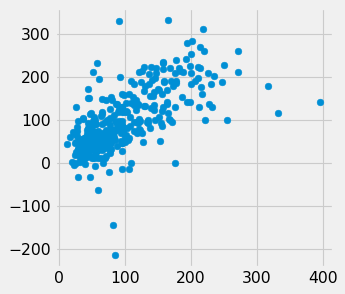

In [20]:
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(y_truth,y_forecasted)
plt.show()

<AxesSubplot:ylabel='predicted_mean'>

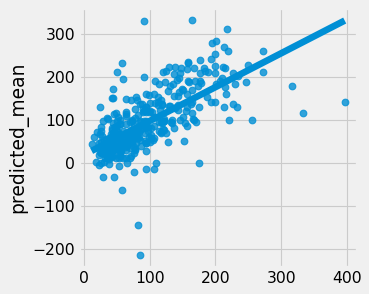

In [21]:
import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(y_truth,y_forecasted,ci=None)

In [22]:
y_truth

Date
2021-01-01    175.785697
2021-02-01     91.330000
2021-03-01    106.390000
2021-04-01    212.860000
2021-05-01    164.527500
                 ...    
2021-12-27    175.250000
2021-12-28    145.305000
2021-12-29    230.415000
2021-12-30    176.117500
2021-12-31    158.620000
Length: 365, dtype: float64

In [23]:
y_forecasted

Date
2021-01-01      0.000000
2021-02-01    329.847167
2021-03-01    -14.581007
2021-04-01    129.584494
2021-05-01    333.718693
                 ...    
2021-12-27    131.033286
2021-12-28    198.398911
2021-12-29    183.243844
2021-12-30    209.476453
2021-12-31    191.446912
Name: predicted_mean, Length: 365, dtype: float64

In [24]:
ax

<AxesSubplot:xlabel='Date', ylabel='AirPolluton PM2.5'>